# About Dataset
<h2> Context</h2>
This an example data source which can be used for Predictive Maintenance Model Building. It consists of the following data:

- Machine conditions and usage: The operating conditions of a machine e.g. data collected from sensors.
- Failure history: The failure history of a machine or component within the machine.
- Maintenance history: The repair history of a machine, e.g. error codes, previous maintenance activities or component replacements.
- Machine features: The features of a machine, e.g. engine size, make and model, location.
<h2> Details</h2>
- Telemetry Time Series Data (PdM_telemetry.csv): It consists of hourly average of voltage, rotation, pressure, vibration collected from 100 machines for the year 2015.

- Error (PdM_errors.csv): These are errors encountered by the machines while in operating condition. Since, these errors don't shut down the machines, these are not considered as failures. The error date and times are rounded to the closest hour since the telemetry data is collected at an hourly rate.

- Maintenance (PdM_maint.csv): If a component of a machine is replaced, that is captured as a record in this table. Components are replaced under two situations: 1. During the regular scheduled visit, the technician replaced it (Proactive Maintenance) 2. A component breaks down and then the technician does an unscheduled maintenance to replace the component (Reactive Maintenance). This is considered as a failure and corresponding data is captured under Failures. Maintenance data has both 2014 and 2015 records. This data is rounded to the closest hour since the telemetry data is collected at an hourly rate.

- Failures (PdM_failures.csv): Each record represents replacement of a component due to failure. This data is a subset of Maintenance
  data. This data is rounded to the closest hour since the telemetry data is collected at an hourly rate.

- Metadata of Machines (PdM_Machines.csv): Model type & age of the Machines.

<h2> Acknowledgements</h2>
This dataset was available as a part of Azure AI Notebooks for Predictive Maintenance. But as of 15th Oct, 2020 the notebook (link) is no longer available. However, the data can still be downloaded using the following URLs:

https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_telemetry.csv
https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_errors.csv
https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_maint.csv
https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_failures.csv
https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_machines.csv

<h2> Inspiration</h2>
Try to use this data to build Machine Learning models related to Predictive Maintenance.

In [121]:
# import packages
import pandas as pd
import numpy as np
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

In [2]:
Error_dt = pd.read_csv("Dataset/PdM_errors.csv")
Failures_dt = pd.read_csv("Dataset/PdM_failures.csv")
Machines_dt = pd.read_csv("Dataset/PdM_machines.csv")
Maint_dt = pd.read_csv("Dataset/PdM_maint.csv")
Telemetry_dt = pd.read_csv("Dataset/PdM_telemetry.csv")

In [3]:
# display the information
def info(x):
    """This function is used to diplay the crucial information about the file"""
    print("================================")
    print("Display the Info")
    print(x.info())
    print()
    print("================================")
    print("Display the columns and row number")
    row, column = x.shape
    print(f"Rows = {row}, columns = {column}")
    print()
    print("================================")
    print("Display sample")
    print(x.sample(5))
    print()
    print("================================")
    print("Display the stats")
    print(x.describe())
    print()
    print("================================")
    print("Display the null values")
    print(x.isna().sum())
    print()
    print("================================")
    print("Display the columns")
    print(x.columns)

In [4]:
# Error dataset info
info(Error_dt)

Display the Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  3919 non-null   int64 
 2   errorID    3919 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB
None

Display the columns and row number
Rows = 3919, columns = 3

Display sample
                 datetime  machineID errorID
3688  2015-06-03 06:00:00         95  error4
495   2015-03-17 07:00:00         14  error2
2641  2015-05-19 06:00:00         69  error3
1544  2015-09-05 03:00:00         40  error5
471   2015-10-04 07:00:00         13  error1

Display the stats
         machineID
count  3919.000000
mean     51.044654
std      28.954988
min       1.000000
25%      25.000000
50%      51.000000
75%      77.000000
max     100.000000

Display the null values
datetime     0
machineID    0
errorID      0
dtype: int64

Displ

In [5]:
# Failures dataset info
info(Failures_dt)

Display the Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   761 non-null    object
 1   machineID  761 non-null    int64 
 2   failure    761 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.0+ KB
None

Display the columns and row number
Rows = 761, columns = 3

Display sample
                datetime  machineID failure
664  2015-08-18 06:00:00         90   comp3
53   2015-01-19 06:00:00         10   comp2
589  2015-10-14 06:00:00         81   comp2
559  2015-02-05 06:00:00         78   comp4
383  2015-01-19 06:00:00         52   comp2

Display the stats
        machineID
count  761.000000
mean    51.911958
std     29.515542
min      1.000000
25%     24.000000
50%     51.000000
75%     79.000000
max    100.000000

Display the null values
datetime     0
machineID    0
failure      0
dtype: int64

Display the columns
Ind

In [6]:
# Machine dataset info
info(Machines_dt)

Display the Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   machineID  100 non-null    int64 
 1   model      100 non-null    object
 2   age        100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB
None

Display the columns and row number
Rows = 100, columns = 3

Display sample
    machineID   model  age
59         60  model4    3
56         57  model4   10
3           4  model3    7
16         17  model1   14
70         71  model2   18

Display the stats
        machineID         age
count  100.000000  100.000000
mean    50.500000   11.330000
std     29.011492    5.856974
min      1.000000    0.000000
25%     25.750000    6.750000
50%     50.500000   12.000000
75%     75.250000   16.000000
max    100.000000   20.000000

Display the null values
machineID    0
model        0
age          0
dtype: int64

Display the columns

In [7]:
# Maint dataset info
info(Maint_dt)

Display the Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3286 non-null   object
 1   machineID  3286 non-null   int64 
 2   comp       3286 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.1+ KB
None

Display the columns and row number
Rows = 3286, columns = 3

Display sample
                 datetime  machineID   comp
2289  2015-02-27 06:00:00         70  comp3
230   2015-07-08 06:00:00          7  comp2
1652  2014-10-14 06:00:00         51  comp4
1767  2015-09-12 06:00:00         54  comp3
1382  2015-07-20 06:00:00         42  comp4

Display the stats
         machineID
count  3286.000000
mean     50.284236
std      28.914478
min       1.000000
25%      25.250000
50%      50.000000
75%      75.000000
max     100.000000

Display the null values
datetime     0
machineID    0
comp         0
dtype: int64

Display the

In [8]:
# Telemetry dataset info
info(Telemetry_dt)

Display the Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   datetime   876100 non-null  object 
 1   machineID  876100 non-null  int64  
 2   volt       876100 non-null  float64
 3   rotate     876100 non-null  float64
 4   pressure   876100 non-null  float64
 5   vibration  876100 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 40.1+ MB
None

Display the columns and row number
Rows = 876100, columns = 6

Display sample
                   datetime  machineID        volt      rotate    pressure  \
593668  2015-10-06 15:00:00         68  162.369739  349.876984   84.981152   
698248  2015-09-13 15:00:00         80  167.427965  526.476505  116.698338   
555447  2015-05-27 06:00:00         64  196.513867  393.202113   91.789788   
193868  2015-02-17 04:00:00         23  175.496840  423.224808   79.072259   
649254  

In [9]:
# combining the dataset
combined_data = pd.concat([Error_dt, Failures_dt, Machines_dt, Maint_dt, Telemetry_dt], ignore_index=True)

In [208]:
combine_copy = combined_data.copy()

<Axes: >

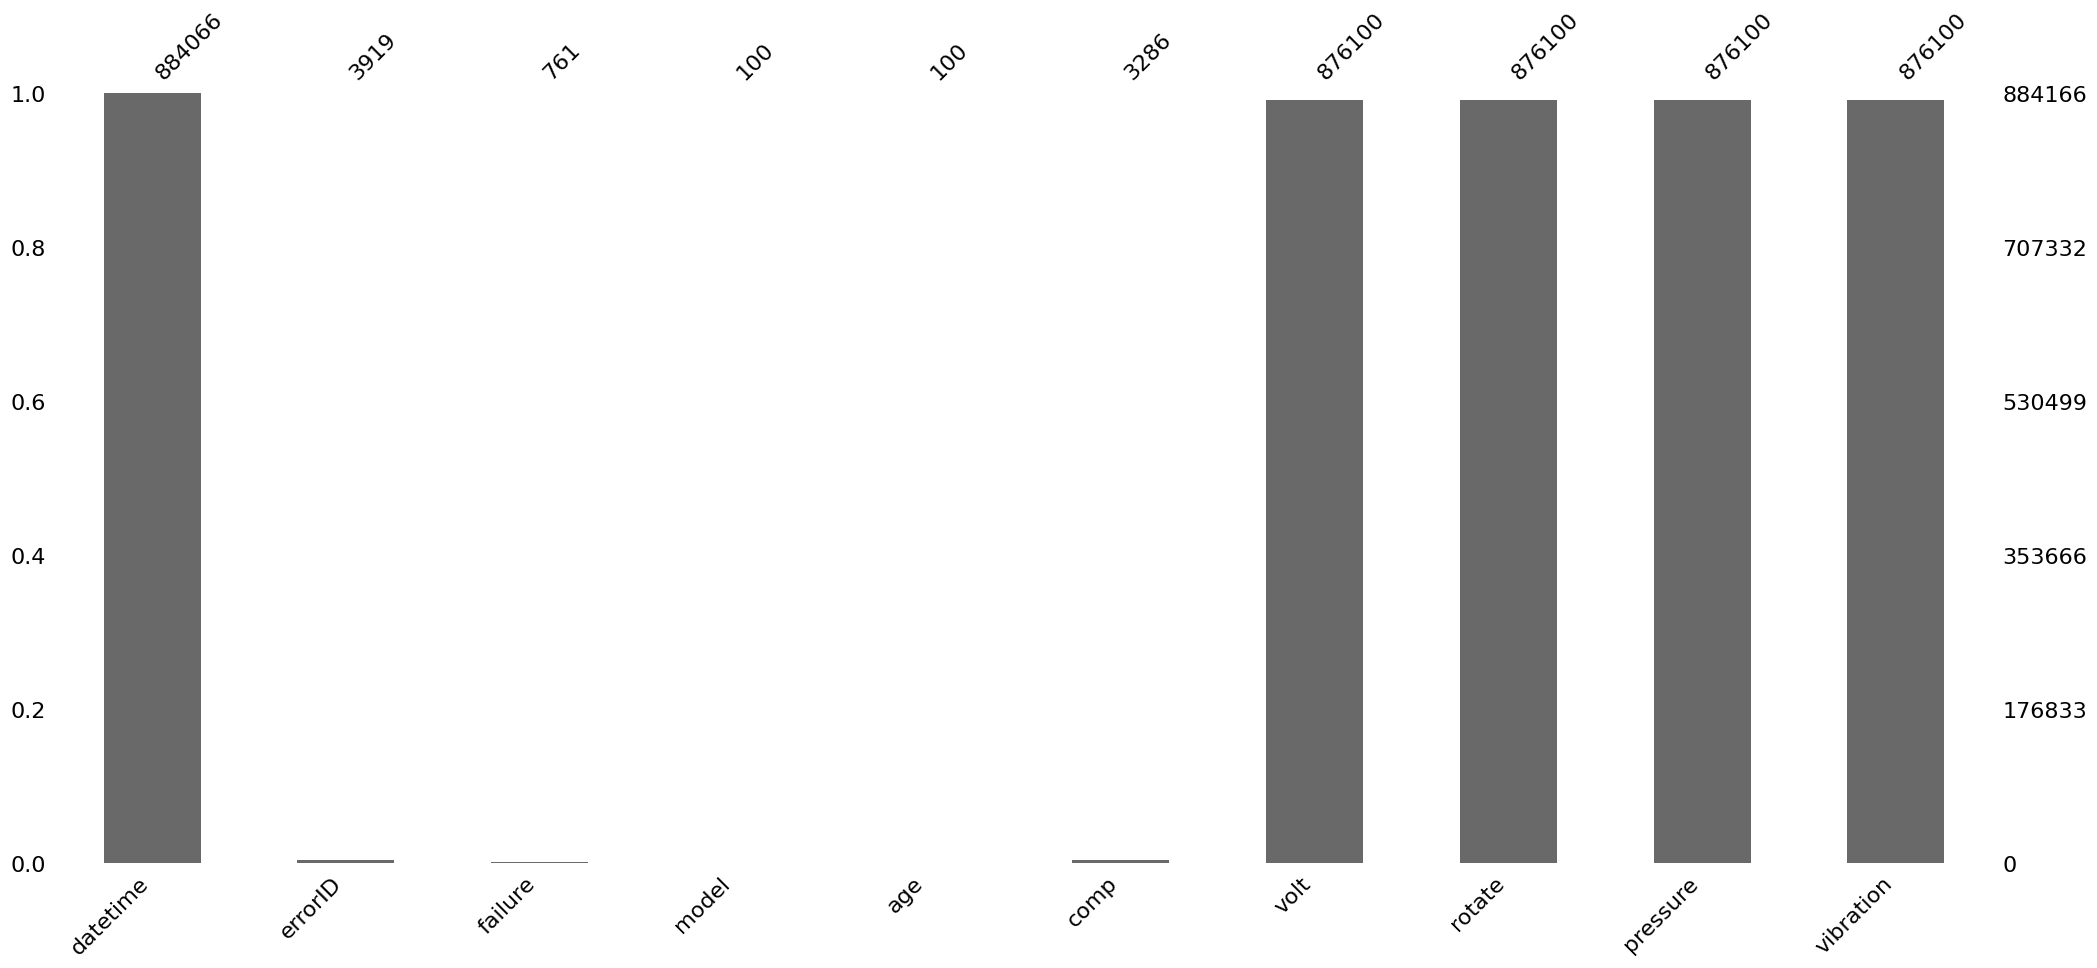

In [209]:
msno.bar(combine_copy)

In [210]:
# checking for duplicate values.
combine_copy.duplicated().sum()

2647

In [211]:
# Dropping Duplicate values
combine_copy.drop_duplicates(inplace=True)

In [ ]:
# set machine id as index
combine_copy.set_index("machineID", inplace=True)

In [193]:
# function for checking the null values
def fillnull(df: pd.DataFrame ,col: str) -> str:
    print(f"Print the no of null values: {df.isna().sum()}")
    print("=======================================================================")
    print()
    print(f" {df[df[col].isna()]}")
    print()
    print("========================================================================")
    print(f"fill the null values using forward fill: {df[col].ffill(inplace=True)}")
    print("========================================================================")
    print()
    print(f"fill the null values using backward fill: {df[col].bfill(inplace=True)}")
    print()
    print("=======================================================================")
    print(f"Print the no of null values: {df.isna().sum()}")
    print()

In [212]:
# display all the null values on a cell
# combine_copy[combine_copy['vibration'].isna()]
col = ["datetime", "errorID", "failure", "model", "comp", "volt",
      "rotate", "pressure", "vibration"]
for i in col:
    fillnull(combine_copy, i)

Print the no of null values: datetime         56
errorID      877975
failure      880942
model        881463
age          881463
comp         880277
volt           5419
rotate         5419
pressure       5419
vibration      5419
dtype: int64

           datetime errorID failure   model   age comp  volt  rotate  pressure  \
machineID                                                                       
1              NaN     NaN     NaN  model3  18.0  NaN   NaN     NaN       NaN   
2              NaN     NaN     NaN  model4   7.0  NaN   NaN     NaN       NaN   
3              NaN     NaN     NaN  model3   8.0  NaN   NaN     NaN       NaN   
4              NaN     NaN     NaN  model3   7.0  NaN   NaN     NaN       NaN   
5              NaN     NaN     NaN  model3   2.0  NaN   NaN     NaN       NaN   
7              NaN     NaN     NaN  model3  20.0  NaN   NaN     NaN       NaN   
8              NaN     NaN     NaN  model3  16.0  NaN   NaN     NaN       NaN   
10             NaN     NaN 

In [59]:
# display all the rows and columns
pd.reset_option("display.max_rows", None)

In [152]:
combine_copy['comp'].unique()

array([nan, 'comp2', 'comp4', 'comp3', 'comp1'], dtype=object)

In [213]:
# filling null values on all the cell
combine_copy['age'].fillna(combine_copy['age'].median(),inplace=True)

<Axes: >

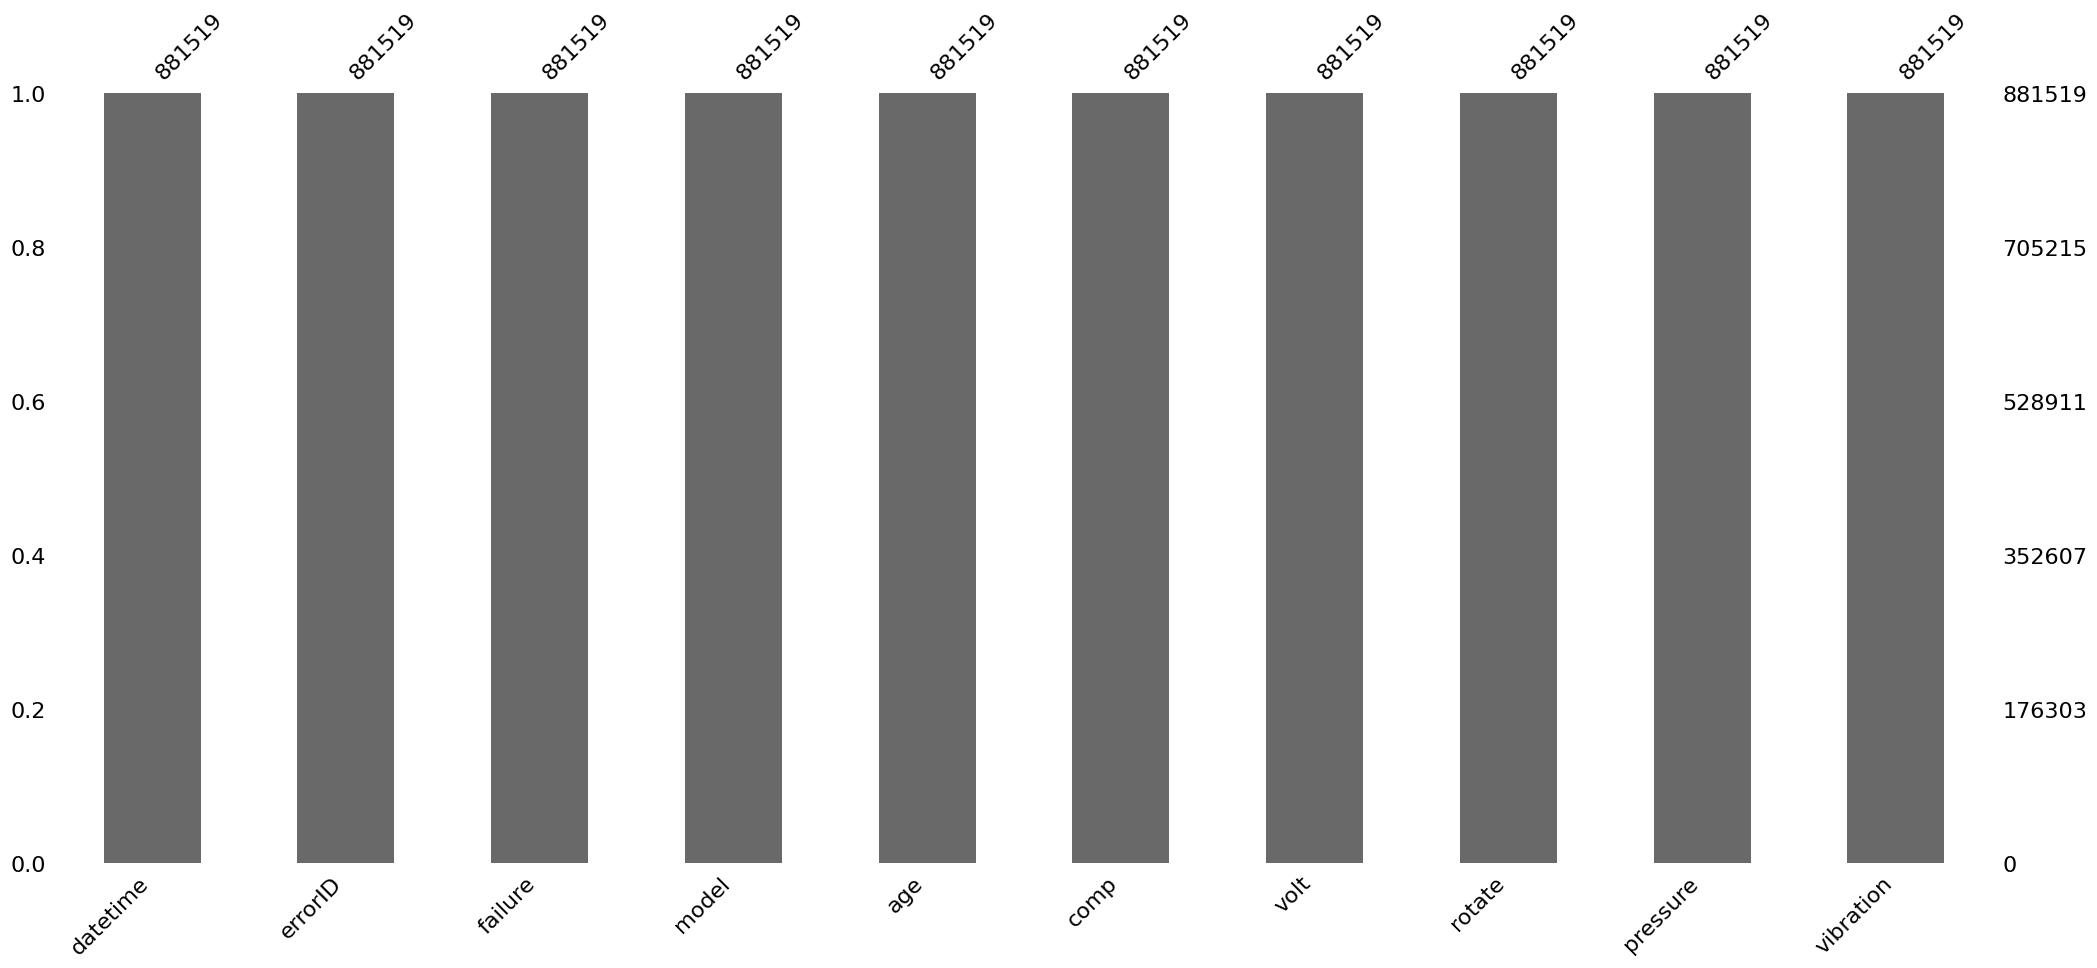

In [216]:
# check if null values are present on the chart
msno.bar(combine_copy)

In [217]:
combine_copy

,datetime,errorID,failure,model,age,comp,volt,rotate,pressure,vibration
machineID,,,,,,,,,,
1,2015-01-03 07:00:00,error1,comp4,model3,10.5,comp2,176.217853,418.504078,113.077935,45.087686
1,2015-01-03 20:00:00,error3,comp4,model3,10.5,comp2,176.217853,418.504078,113.077935,45.087686
1,2015-01-04 06:00:00,error5,comp4,model3,10.5,comp2,176.217853,418.504078,113.077935,45.087686
1,2015-01-10 15:00:00,error4,comp4,model3,10.5,comp2,176.217853,418.504078,113.077935,45.087686
1,2015-01-22 10:00:00,error4,comp4,model3,10.5,comp2,176.217853,418.504078,113.077935,45.087686
...,...,...,...,...,...,...,...,...,...,...
100,2016-01-01 02:00:00,error3,comp1,model1,10.5,comp4,179.438162,395.222827,102.290715,50.771941
100,2016-01-01 03:00:00,error3,comp1,model1,10.5,comp4,189.617555,446.207972,98.180607,35.123072
100,2016-01-01 04:00:00,error3,comp1,model1,10.5,comp4,192.483414,447.816524,94.132837,48.314561


In [230]:
# manipulating the datetime column
combine_copy['datetime']= pd.to_datetime(combine_copy['datetime'])

In [236]:
print(combine_copy['datetime'].dtypes)

datetime64[ns]


In [ ]:
# separating the the datetime column into year, month, date and hour
combine_copy['year'] = combine_copy['datetime'].dt.year
combine_copy['month'] = combine_copy['datetime'].dt.month
combine_copy['date'] = combine_copy['datetime'].dt.day
combine_copy['hour'] = combine_copy['datetime'].dt.hour

In [252]:
# # changing the month from numerical to string using python package
# import calendar

# # creating a map dictionary
# month_names = {i: calendar.month_abbr[i] for i in range(1, 13)}

# combine_copy['month'] = combine_copy['month'].map(month_names)

In [251]:
# using dictionary
month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
        7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

combine_copy['month'] = combine_copy['month'].map(month)

In [282]:
combine_copy

,datetime,errorID,failure,model,age,comp,volt,rotate,pressure,vibration,year,month,date,hour
machineID,,,,,,,,,,,,,,
1,2015-01-03 07:00:00,error1,comp4,model3,10,comp2,176.217853,418.504078,113.077935,45.087686,2015,Jan,3,7
1,2015-01-03 20:00:00,error3,comp4,model3,10,comp2,176.217853,418.504078,113.077935,45.087686,2015,Jan,3,20
1,2015-01-04 06:00:00,error5,comp4,model3,10,comp2,176.217853,418.504078,113.077935,45.087686,2015,Jan,4,6
1,2015-01-10 15:00:00,error4,comp4,model3,10,comp2,176.217853,418.504078,113.077935,45.087686,2015,Jan,10,15
1,2015-01-22 10:00:00,error4,comp4,model3,10,comp2,176.217853,418.504078,113.077935,45.087686,2015,Jan,22,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2016-01-01 02:00:00,error3,comp1,model1,10,comp4,179.438162,395.222827,102.290715,50.771941,2016,Jan,1,2
100,2016-01-01 03:00:00,error3,comp1,model1,10,comp4,189.617555,446.207972,98.180607,35.123072,2016,Jan,1,3
100,2016-01-01 04:00:00,error3,comp1,model1,10,comp4,192.483414,447.816524,94.132837,48.314561,2016,Jan,1,4


In [272]:
combine_copy.columns

Index(['datetime', 'errorID', 'failure', 'model', 'age', 'comp', 'volt',
       'rotate', 'pressure', 'vibration', 'year', 'month', 'date', 'hour'],
      dtype='object')

In [ ]:
combine_copy['age'].unique()

In [284]:
combine_copy['age'] = combine_copy['age'].astype(int)

In [292]:
def round_value(df: pd.DataFrame, col: float) -> float:
    df[col] = round(df[col], 2)

In [299]:
values = ['volt','rotate', 'pressure', 'vibration']
for i in values:
    round_value(combine_copy, i)

In [304]:
combine_copy

,datetime,errorID,failure,model,age,comp,volt,rotate,pressure,vibration,year,month,date,hour
machineID,,,,,,,,,,,,,,
1,2015-01-03 07:00:00,error1,comp4,model3,10,comp2,176.22,418.50,113.08,45.09,2015,Jan,3,7
1,2015-01-03 20:00:00,error3,comp4,model3,10,comp2,176.22,418.50,113.08,45.09,2015,Jan,3,20
1,2015-01-04 06:00:00,error5,comp4,model3,10,comp2,176.22,418.50,113.08,45.09,2015,Jan,4,6
1,2015-01-10 15:00:00,error4,comp4,model3,10,comp2,176.22,418.50,113.08,45.09,2015,Jan,10,15
1,2015-01-22 10:00:00,error4,comp4,model3,10,comp2,176.22,418.50,113.08,45.09,2015,Jan,22,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2016-01-01 02:00:00,error3,comp1,model1,10,comp4,179.44,395.22,102.29,50.77,2016,Jan,1,2
100,2016-01-01 03:00:00,error3,comp1,model1,10,comp4,189.62,446.21,98.18,35.12,2016,Jan,1,3
100,2016-01-01 04:00:00,error3,comp1,model1,10,comp4,192.48,447.82,94.13,48.31,2016,Jan,1,4


# Visualization Data

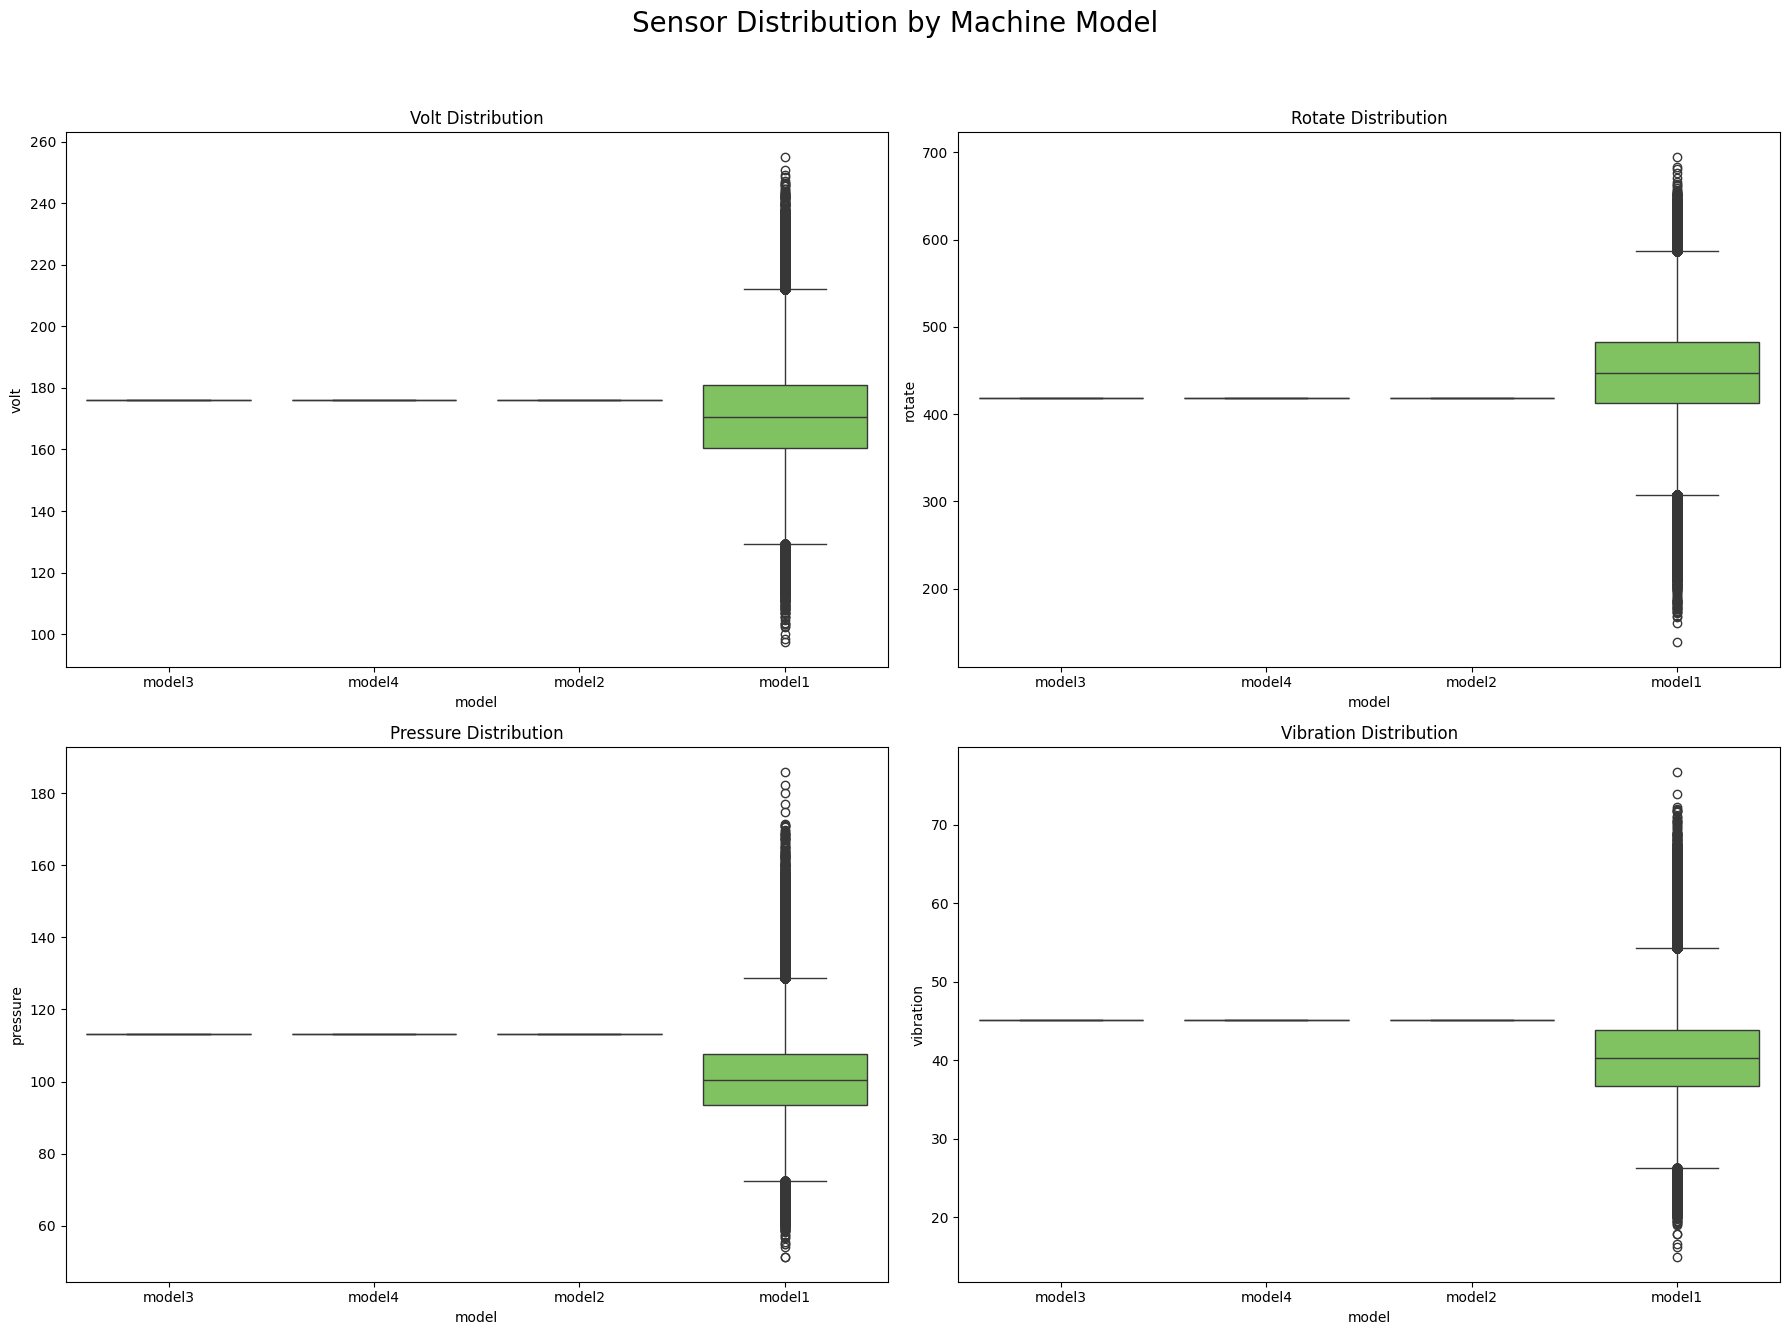

In [309]:
# Equipment Health profile box plot
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Sensor Distribution by Machine Model', fontsize=20)

sensors = ['volt', 'rotate', 'pressure', 'vibration']
for i, sensor in enumerate(sensors):
    ax = axes[i//2, i%2]
    sns.boxplot(data=combine_copy, x='model', y=sensor, ax=ax, palette='viridis')
    ax.set_title(f'{sensor.capitalize()} Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])